In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset.

In [59]:
pharmacy_med_reviews_trainset = pd.read_csv("C:/Users/kvknb/OneDrive/Desktop/PharmacyMedReviews/train.csv")
print(pharmacy_med_reviews_trainset.sample(10))

                                   unique_hash  \
1387  7a8715045689fb77862e6425eed0f55ee079ae1c   
4501  8d529f21081d99b0617c9d75f6b075ee2009d645   
3529  7e4d46b93bb99228dbef2eeaa7575885baebbf75   
38    5eca9f0458bac17bf89188de1b9a61fcea05e7ce   
3831  fb209c6d722149601c7501da59f8a79bb8ece92e   
3950  1d959e48be7bf21f90946815832cab56338e3dd5   
655   ad9fa9f8a10dfa7fb4418332e69a0abd209cab7d   
561   e317399c733ab82402cfcf29ae38d19f0ce2879f   
3635  7c5d8a7d5406e4b07cdeaaadc882b0ccfa834f94   
646   5227f82ddc10bb18c80bd80094ad86b74e67fc24   

                                                   text           drug  \
1387  hello smurf i remember you being on here. ther...        gilenya   
4501  I have been living with Crohn’s disease for ov...         humira   
3529  Hi Janet, I’m sorry to hear of your brother’s ...        tarceva   
38    In May of 2017, I started on the targeted trea...       mekinist   
3831  Cladribine Tablets were expected to be one of ...     cladribine   
3950 

In [60]:
pharmacy_med_reviews_testset = pd.read_csv("C:/Users/kvknb/OneDrive/Desktop/PharmacyMedReviews/test.csv")
print(pharmacy_med_reviews_testset.sample(10))

                                   unique_hash  \
2812  6feb110fd96646c56796196a7abeca19df7e7db9   
836   054188eeda69933eb8d472a8584332a426545fc5   
54    6cff04f207455085cdce32ed6adbd3c95616bb04   
999   c989b0961ead21ae9799177390b351c43a402c03   
1049  e214ddca2f46039c7e97c72fe9989c15cd3cf0d3   
2338  6baa30287277c911ab9efb4c5dfed0a0c9df26ca   
1164  ccca6a06b48de7c5fb7370da2d3e9e3922fe3187   
749   77c300671056a5ec94725aa189f10012fc7594c0   
360   328c5712c7120d4fb64516f99c3cd87743004c6a   
593   3b5ddd14aeb7464252f53d270d89484f92fc9a08   

                                                   text          drug  
2812  After failing Remicade, Humira, Cimzia, and En...       stelara  
836   By Pete Farley ‘Unprecedented’ Effects in Rela...       ocrevus  
54    I usually would have a mild flare once a year....        humira  
999   Thanks for the replies. I am male, Notsosickly...  upadacitinib  
1049  Yes, he had a relapse on fingolimod. He had be...    fingolimod  
2338  MaybeG will

#### Finding the number of drugs.

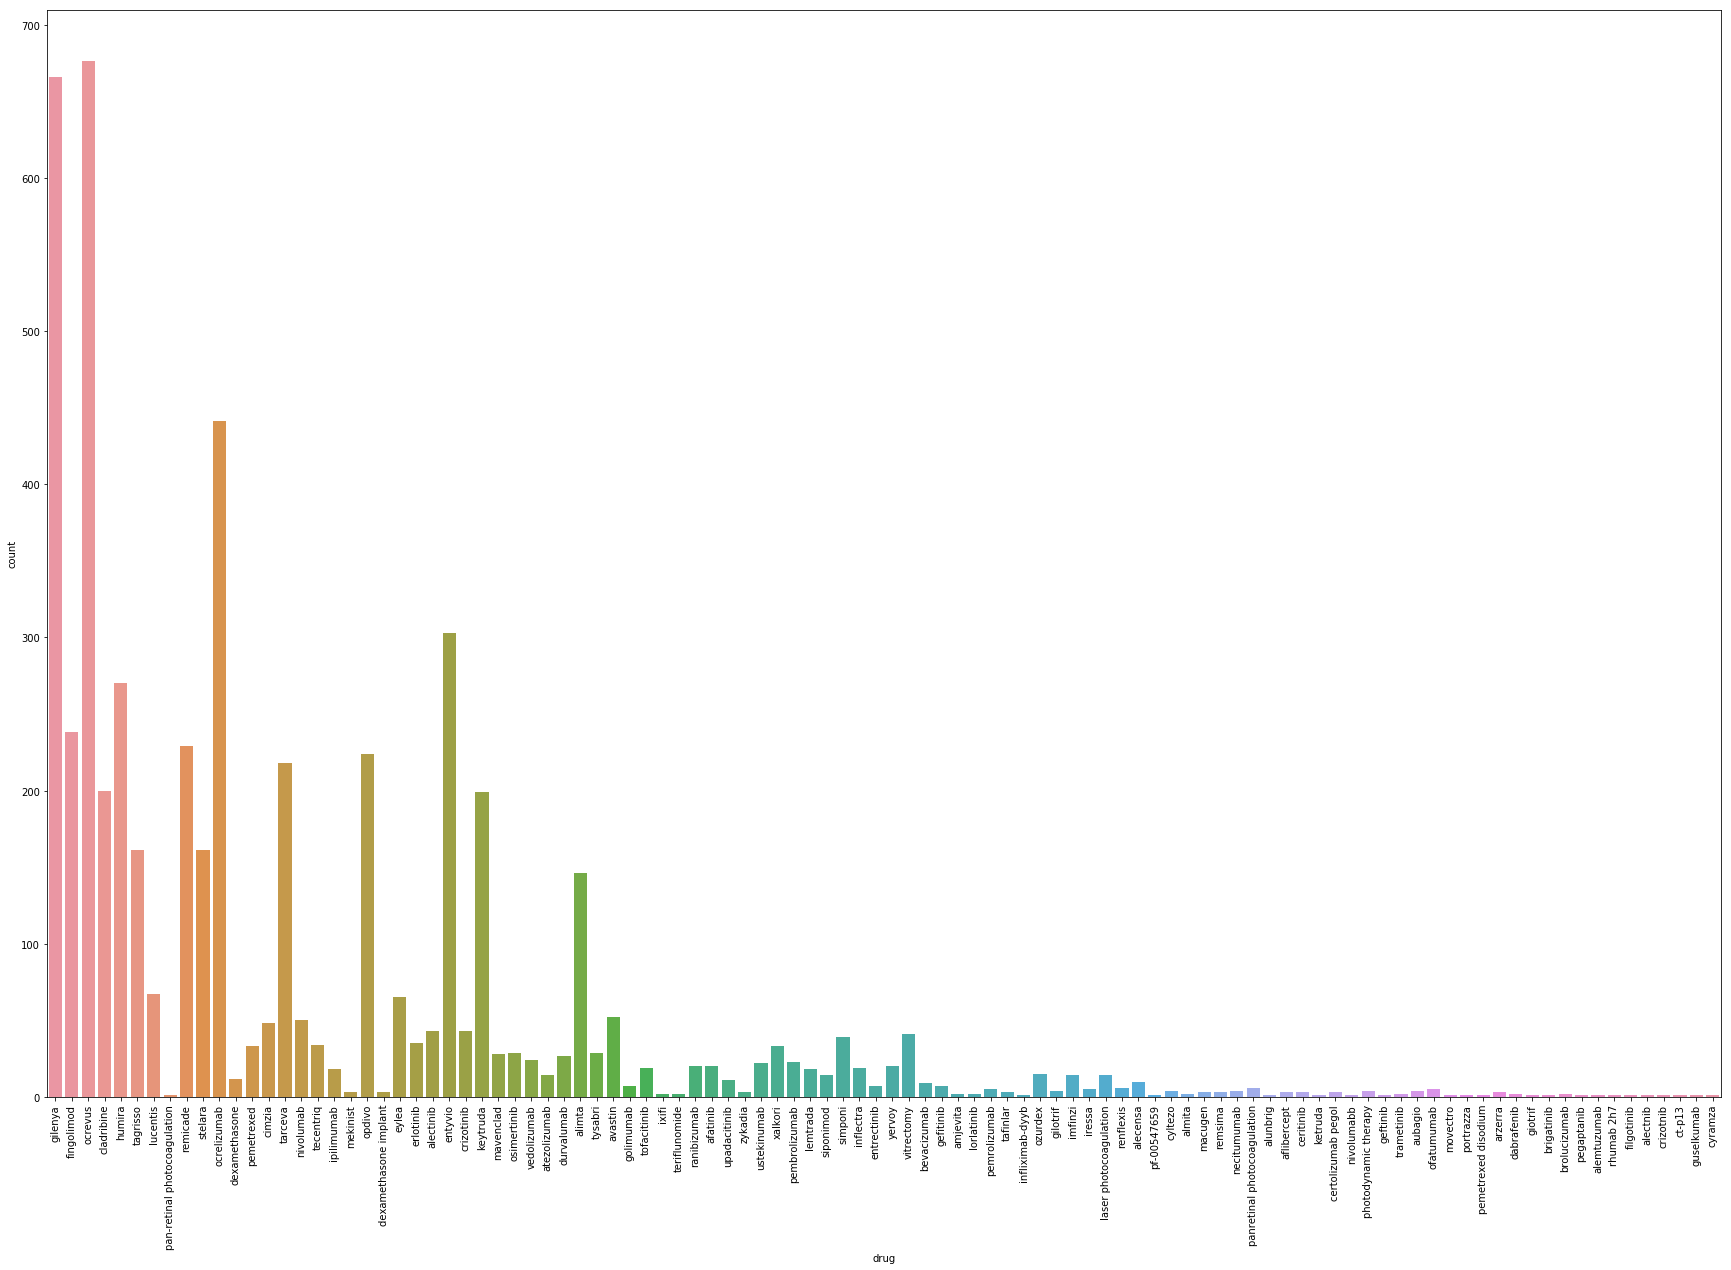

In [61]:
# Countplot to see the frequency of the drugs in the traning set.
plt.figure(figsize=(30,20))
sns.countplot(pharmacy_med_reviews_trainset['drug'])
plt.xticks(rotation=90)
plt.show()

#### Observations:
##### From the graphs we can see that the drugs about which most of the reviews were given are "Ocrevus" followed by "Gilenya" and "Ocrelizumab"

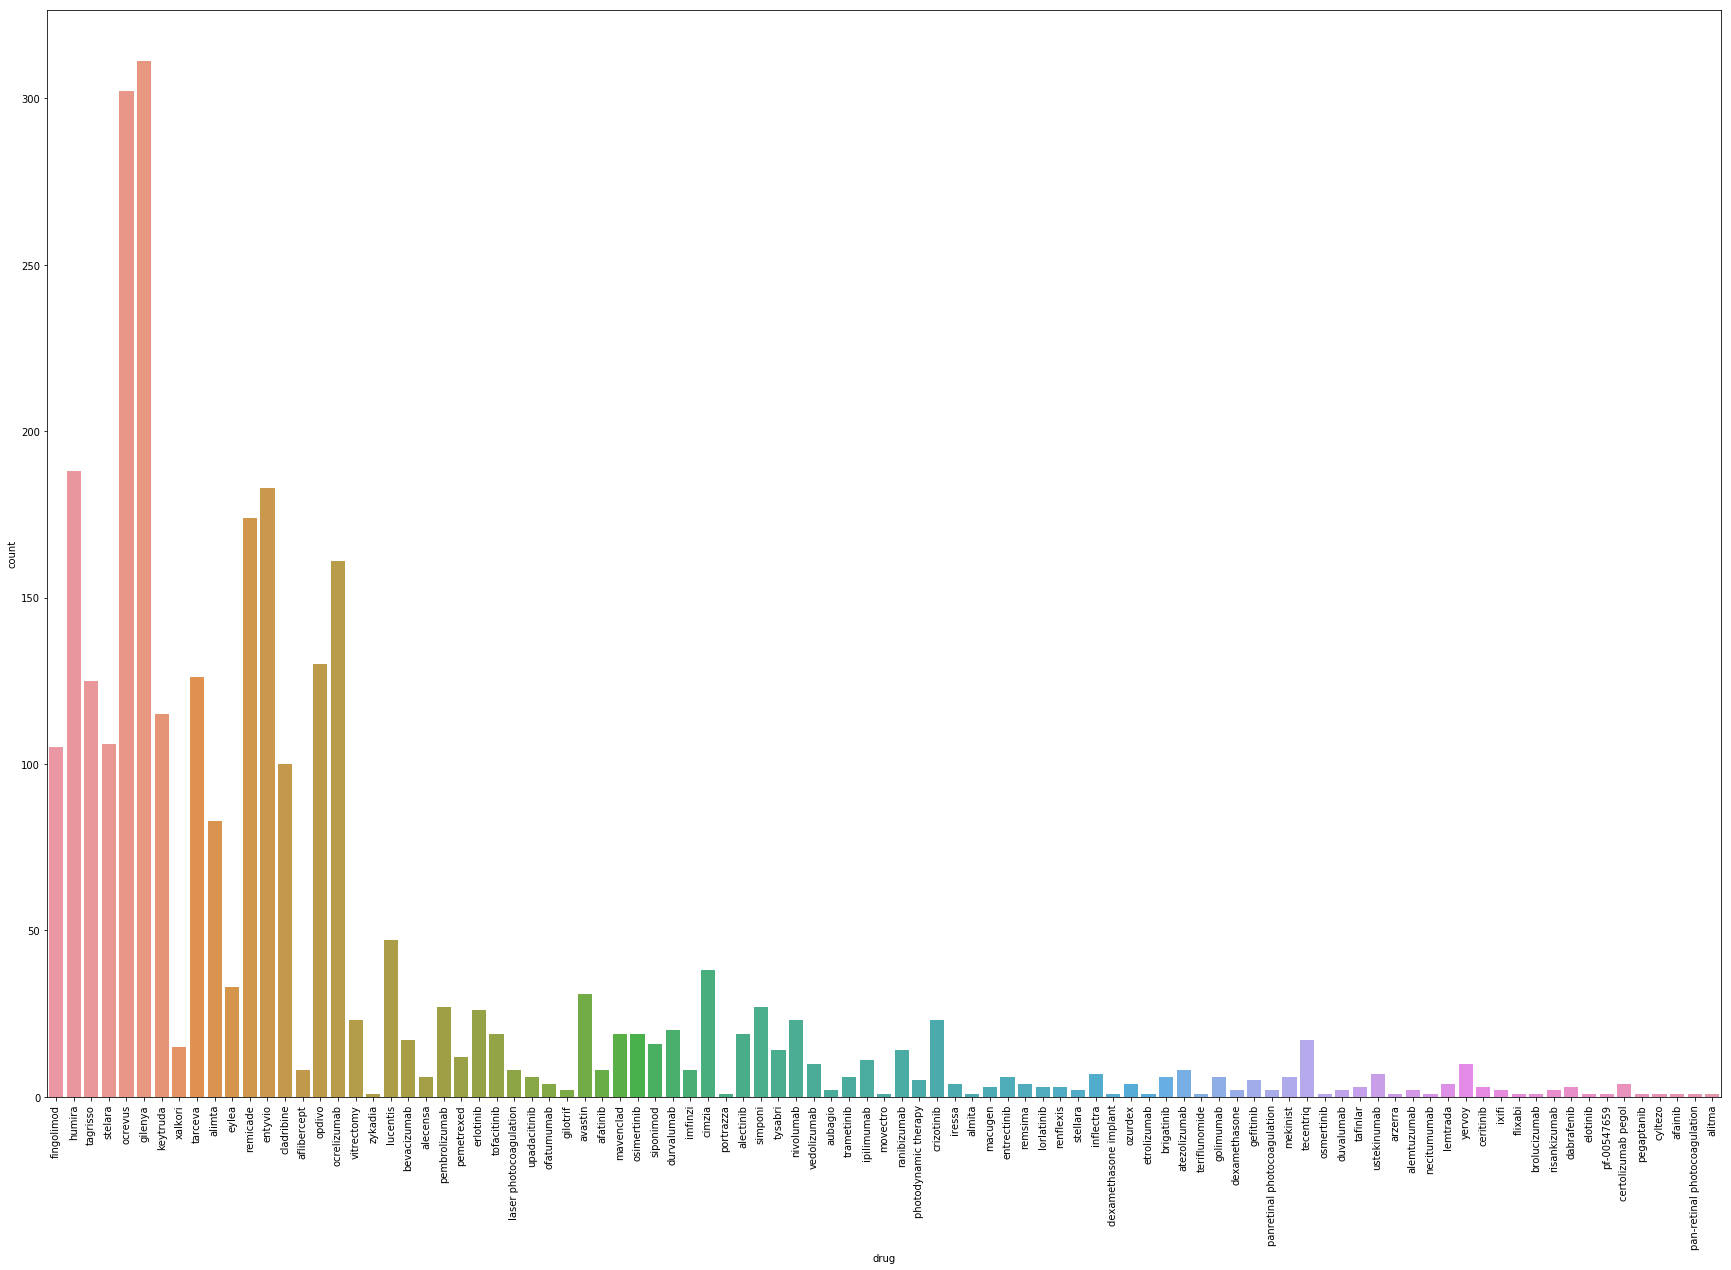

In [62]:
# Countplot to see the frequency of the drugs in the test set.
plt.figure(figsize=(30,20))
sns.countplot(pharmacy_med_reviews_testset['drug'])
plt.xticks(rotation=90)
plt.show()

#### Observations:
##### From the graphs we can see that the drugs about which most of the reviews were given are "Gilenya" followed by "Ocrevus" and "Fingolimod"
##### We can clearly see that there was some changes in the amount of reviews given for certain drugs.

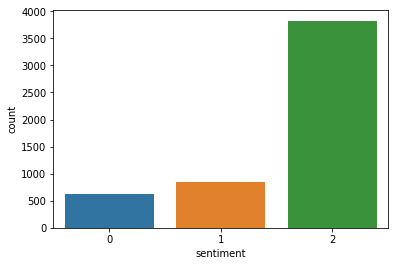

In [63]:
# Countplot to see the frequency of the sentiments in the sentiment column in training set.
sns.countplot(pharmacy_med_reviews_trainset['sentiment'])
plt.show()

In [66]:
# WordCloud before preprocessing of the data for the training set.
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

text_string = " ".join(pharmacy_med_reviews_trainset['text'].str.lower())
wordcloud = WordCloud(background_color='white').generate(text_string)

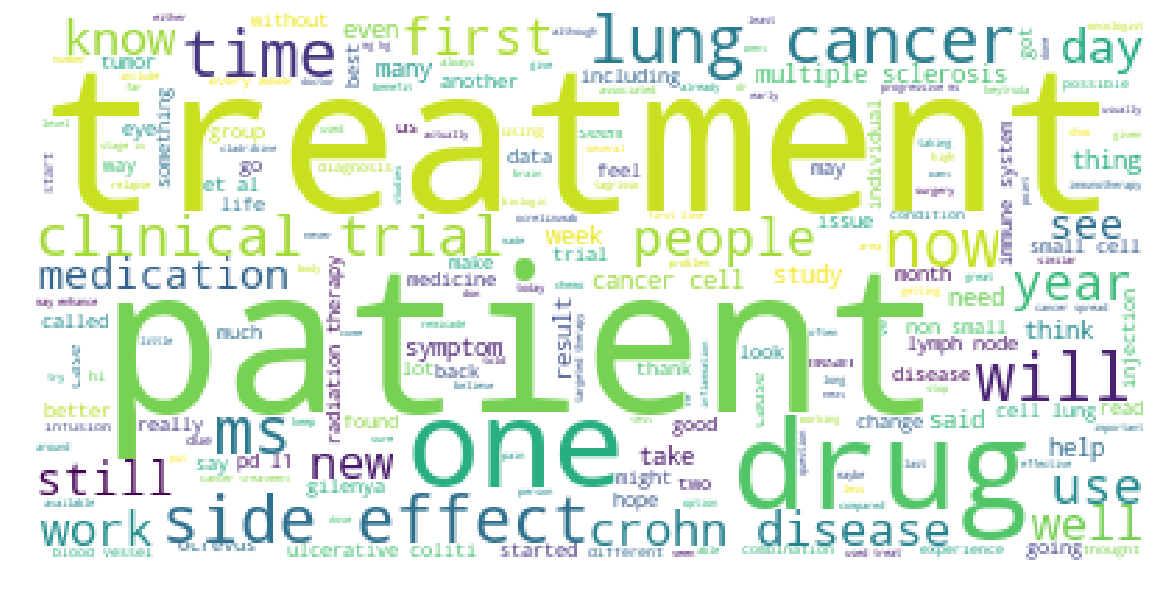

In [69]:
# Showing the wordcloud.
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

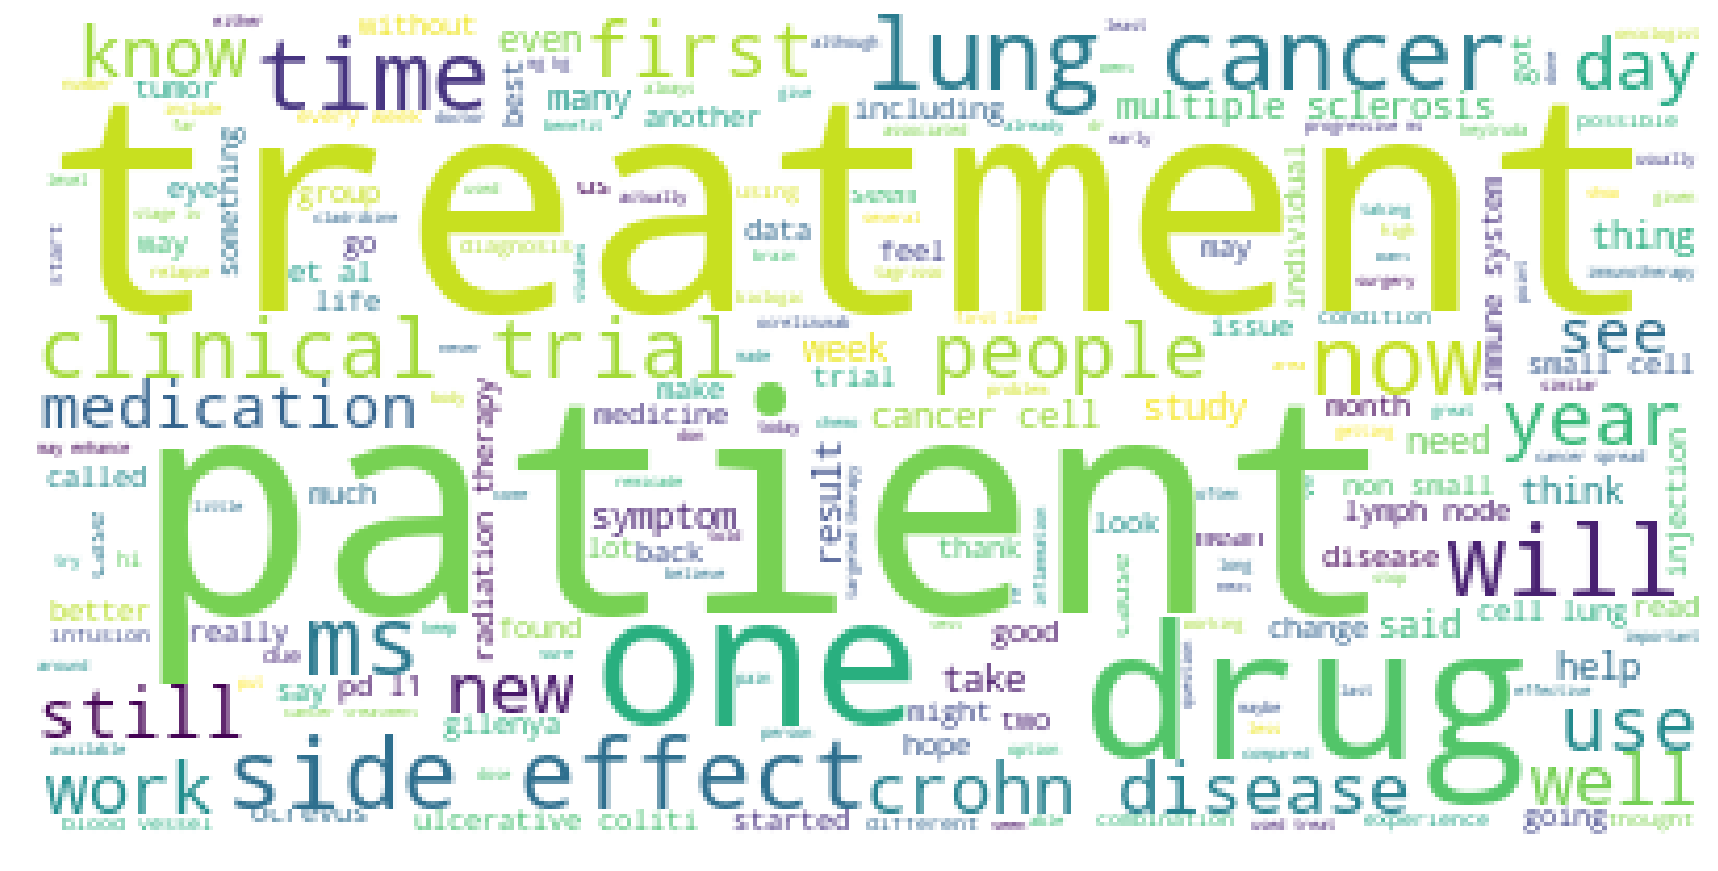

In [68]:
# WordCloud before preprocessing of the data for the testing set
text_string = " ".join(pharmacy_med_reviews_testset['text'].str.lower())
wordcloud = WordCloud(background_color='white').generate(text_string)
plt.figure(figsize=(30,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### -----------------------------------------------------------------------------------------------------------

## NLP Pipeline:

#### Preprocessing of the data using NeatText Package for both training and testing sets

In [70]:
# Importing the necessary libraries.

from neattext import TextCleaner

In [72]:
# Data frame for the training set.
p_m_r_df = pd.DataFrame(pharmacy_med_reviews_trainset)
p_m_r_df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [73]:
# Data Frame for the testing set.
p_m_r_df1 = pd.DataFrame(pharmacy_med_reviews_testset)
p_m_r_df1.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [74]:
df = pd.DataFrame(p_m_r_df[['text','drug','sentiment']])

In [75]:
df1 = pd.DataFrame(p_m_r_df1[['text','drug']])

In [76]:
docx = TextCleaner()

#### Removing the numbers.

In [77]:
# Removing the numbers from the text for training set.
df['text'] = df.apply(lambda docx: TextCleaner(docx['text']).remove_numbers(),axis=1)

In [78]:
df.head()

,text,drug,sentiment
0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,I can completely understand why you’d want to ...,gilenya,2
2,Interesting that it only targets SP-/ receptor...,fingolimod,2
3,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [79]:
# Removing the numbers from the text for training set.
df1['text'] = df1.apply(lambda docx: TextCleaner(docx['text']).remove_numbers(),axis=1)
df1.head()

,text,drug
0,"(previously stable on natalizumab), with % sw...",fingolimod
1,On fingolimod and have been since December ; t...,fingolimod
2,Apparently it's shingles! :-/ I do have a few ...,humira
3,If the Docetaxel doing once a week x weeks the...,tagrisso
4,"CC, Stelara worked in a matter of days for me....",stelara


#### Removing the email_id's

In [19]:
# Removing the email address from the reviews of training set.
df['text'] = df.apply(lambda docx: TextCleaner(docx['text']).remove_emails(),axis=1)
df.head()

,text
0,Autoimmune diseases tend come clusters As Gile...
1,I completely understand youd want try But resu...
2,Interesting targets SP receptors rather like F...
3,Very interesting grand merci Now I wonder lemt...
4,Hi everybody My latest MRI results Brain Cervi...


In [80]:
# Removing the email address from the reviews of the testing set.
df1['text'] = df1.apply(lambda docx: TextCleaner(docx['text']).remove_emails(),axis=1)
df1.head()

,text,drug
0,"(previously stable on natalizumab), with % sw...",fingolimod
1,On fingolimod and have been since December ; t...,fingolimod
2,Apparently it's shingles! :-/ I do have a few ...,humira
3,If the Docetaxel doing once a week x weeks the...,tagrisso
4,"CC, Stelara worked in a matter of days for me....",stelara


#### Removing Phone Numbers

In [81]:
# Removing the phone numbers from the reviews of training set.
df['text'] = df.apply(lambda docx: TextCleaner(docx['text']).remove_phone_numbers(),axis=1)
df.head()

,text,drug,sentiment
0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,I can completely understand why you’d want to ...,gilenya,2
2,Interesting that it only targets SP-/ receptor...,fingolimod,2
3,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [82]:
# Removing the phone numbers from the reviews of testing set.
df1['text'] = df1.apply(lambda docx: TextCleaner(docx['text']).remove_phone_numbers(),axis=1)
df1.head()

,text,drug
0,"(previously stable on natalizumab), with % sw...",fingolimod
1,On fingolimod and have been since December ; t...,fingolimod
2,Apparently it's shingles! :-/ I do have a few ...,humira
3,If the Docetaxel doing once a week x weeks the...,tagrisso
4,"CC, Stelara worked in a matter of days for me....",stelara


#### Special Characters.

In [83]:
# Removing the special charcaters from the reviews training set.
df['text'] = df.apply(lambda docx: TextCleaner(docx['text']).remove_special_characters(),axis=1)
df.head()

,text,drug,sentiment
0,Autoimmune diseases tend to come in clusters A...,gilenya,2
1,I can completely understand why youd want to t...,gilenya,2
2,Interesting that it only targets SP receptors ...,fingolimod,2
3,Very interesting grand merci Now I wonder wher...,ocrevus,2
4,Hi everybody My latest MRI results for Brain a...,gilenya,1


In [84]:
# Removing the special charcaters from the reviews testing set.
df1['text'] = df1.apply(lambda docx: TextCleaner(docx['text']).remove_special_characters(),axis=1)
df1.head()

,text,drug
0,previously stable on natalizumab with switch...,fingolimod
1,On fingolimod and have been since December th...,fingolimod
2,Apparently its shingles I do have a few red s...,humira
3,If the Docetaxel doing once a week x weeks the...,tagrisso
4,CC Stelara worked in a matter of days for me I...,stelara


#### Emojis Removal

In [85]:
# Removing the emojis from the reviews of training set.
df['text'] = df.apply(lambda docx: TextCleaner(docx['text']).remove_emojis(),axis=1)
df.head()

,text,drug,sentiment
0,Autoimmune diseases tend to come in clusters A...,gilenya,2
1,I can completely understand why youd want to t...,gilenya,2
2,Interesting that it only targets SP receptors ...,fingolimod,2
3,Very interesting grand merci Now I wonder wher...,ocrevus,2
4,Hi everybody My latest MRI results for Brain a...,gilenya,1


In [86]:
# Removing the emojis from the reviews of testing set.
df1['text'] = df1.apply(lambda docx: TextCleaner(docx['text']).remove_emojis(),axis=1)
df1.head()

,text,drug
0,previously stable on natalizumab with switch...,fingolimod
1,On fingolimod and have been since December th...,fingolimod
2,Apparently its shingles I do have a few red s...,humira
3,If the Docetaxel doing once a week x weeks the...,tagrisso
4,CC Stelara worked in a matter of days for me I...,stelara


#### Stopwords Removal

In [87]:
# Removing the stop words from the reviews of training set.
df['text'] = df.apply(lambda x: TextCleaner(x['text']).remove_stopwords(),axis=1)
df.head()

,text,drug,sentiment
0,Autoimmune diseases tend come clusters As Gile...,gilenya,2
1,I completely understand youd want try But resu...,gilenya,2
2,Interesting targets SP receptors rather like F...,fingolimod,2
3,Very interesting grand merci Now I wonder lemt...,ocrevus,2
4,Hi everybody My latest MRI results Brain Cervi...,gilenya,1


In [88]:
# Removing the stop words from the reviews of testing set.
df1['text'] = df1.apply(lambda x: TextCleaner(x['text']).remove_stopwords(),axis=1)
df1.head()

,text,drug
0,previously stable natalizumab switching fingol...,fingolimod
1,On fingolimod since December way I describe be...,fingolimod
2,Apparently shingles I red spots left breast ap...,humira
3,If Docetaxel week x weeks week claim less hars...,tagrisso
4,CC Stelara worked matter days If GI willing ju...,stelara


#### Making everything to lower case.

In [89]:
# Making all the text in the reviews of the training set to lower case.
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,text,drug,sentiment
0,autoimmune diseases tend come clusters as gile...,gilenya,2
1,i completely understand youd want try but resu...,gilenya,2
2,interesting targets sp receptors rather like f...,fingolimod,2
3,very interesting grand merci now i wonder lemt...,ocrevus,2
4,hi everybody my latest mri results brain cervi...,gilenya,1


In [90]:
# Making all the text in the reviews of the testing set to lower case.
df1['text'] = df1['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1.head()

,text,drug
0,previously stable natalizumab switching fingol...,fingolimod
1,on fingolimod since december way i describe be...,fingolimod
2,apparently shingles i red spots left breast ap...,humira
3,if docetaxel week x weeks week claim less hars...,tagrisso
4,cc stelara worked matter days if gi willing ju...,stelara


##### Stemming using the NLTk package

In [91]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [92]:
# Stemming for the reviews in the training set.
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,text,drug,sentiment
0,autoimmun diseas tend come cluster as gilenya ...,gilenya,2
1,i complet understand youd want tri but result ...,gilenya,2
2,interest target sp receptor rather like fingol...,fingolimod,2
3,veri interest grand merci now i wonder lemtrad...,ocrevus,2
4,hi everybodi my latest mri result brain cervic...,gilenya,1


In [93]:
# Stemming for the reviews in the testing set.
df1['text'] = df1['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df1.head()

,text,drug
0,previous stabl natalizumab switch fingolimod,fingolimod
1,on fingolimod sinc decemb way i describ better...,fingolimod
2,appar shingl i red spot left breast appear day...,humira
3,if docetaxel week x week week claim less harsh...,tagrisso
4,cc stelara work matter day if gi will jump hoo...,stelara


##### Parts of Speech Tagging

In [54]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kvknb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
# Parts of speech tagging for the training set.
parts_of_speech = nltk.pos_tag(df['text'])

In [56]:
parts_of_speech

[('autoimmun diseas tend come cluster as gilenya feel good dont think wont chang anyth wast time energi im take tysabri feel amaz symptom dodgi color vision ive sinc alway dont know i dont know last month year decad ive decid enjoy ride point worri',
  'NN'),
 ('i complet understand youd want tri but result report lectur dont alway stand scrutini peerreview public there much still convinc i hope work i realli and your awar happi risk that great i think import present balanc way understand dont move straight first show promis anim studi use drug human there still lot anim data gather human data gather anyon tell safe effect i cant tell mani time anim studi dont follow human one major attrit point drug develop youv unpredict issu cladribinegilenya interact wasnt predict but peopl tri doctor see pattern work what go clemastinemetformin excit given youv said current condit person risk toler make sens tri it definit wouldnt everyon',
  'NN'),
 ('interest target sp receptor rather like fingo

In [94]:
# Parts of speech tagging for the testing set.
parts_of_speech = nltk.pos_tag(df1['text'])
parts_of_speech

[('previous stabl natalizumab switch fingolimod', 'NN'),
 ('on fingolimod sinc decemb way i describ better like feel drunk without drink',
  'VBP'),
 ('appar shingl i red spot left breast appear day ago wasnt sure connect show gp immedi said shingl appar cos i left day late prescrib anyth shingl the gp prescrib useless amitryptilin i probabl wont take even low dose make unbear groggi still entir happi cos stomach pain bad ive lot bloat stuff no fever far i know anyon experi shingl seem like i expect week dx crohn june yay tri asa azathioprin mp remicad methotrex humira diet st surgeri subtot colectomi end ileostomi nd surgeri ileorect anastomosi stoma revers ileum connect rectum current status chronic flare do i kind current med mg mp entyvio start',
  'JJ'),
 ('if docetaxel week x week week claim less harsh efficaci everi week diagnos stage nsclc egfr also posit tm year tarceva month rociletinib wbr follow month tarcrva pulsecarboplatinavastinalimta month tagrisso was diagnos leptomen

#### WordCloud after preprocessing of the data.

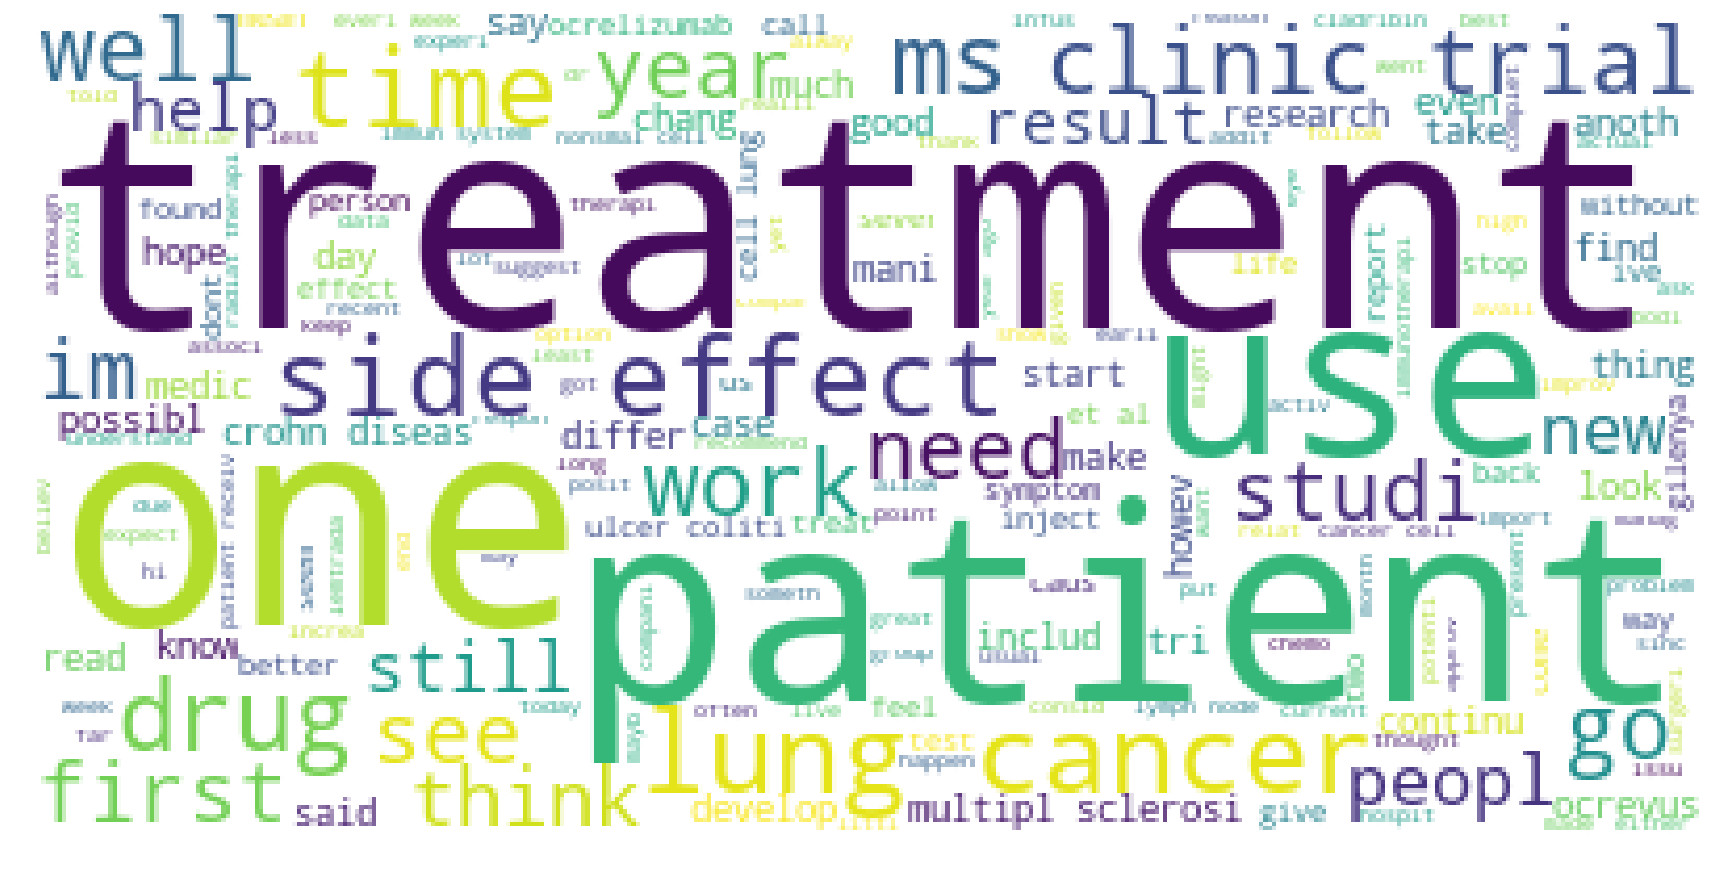

In [95]:
# Wordcloud after preprocessing of the data

text_string = " ".join(df['text'].str.lower())
wordcloud = WordCloud(background_color='white').generate(text_string)
plt.figure(figsize=(30,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

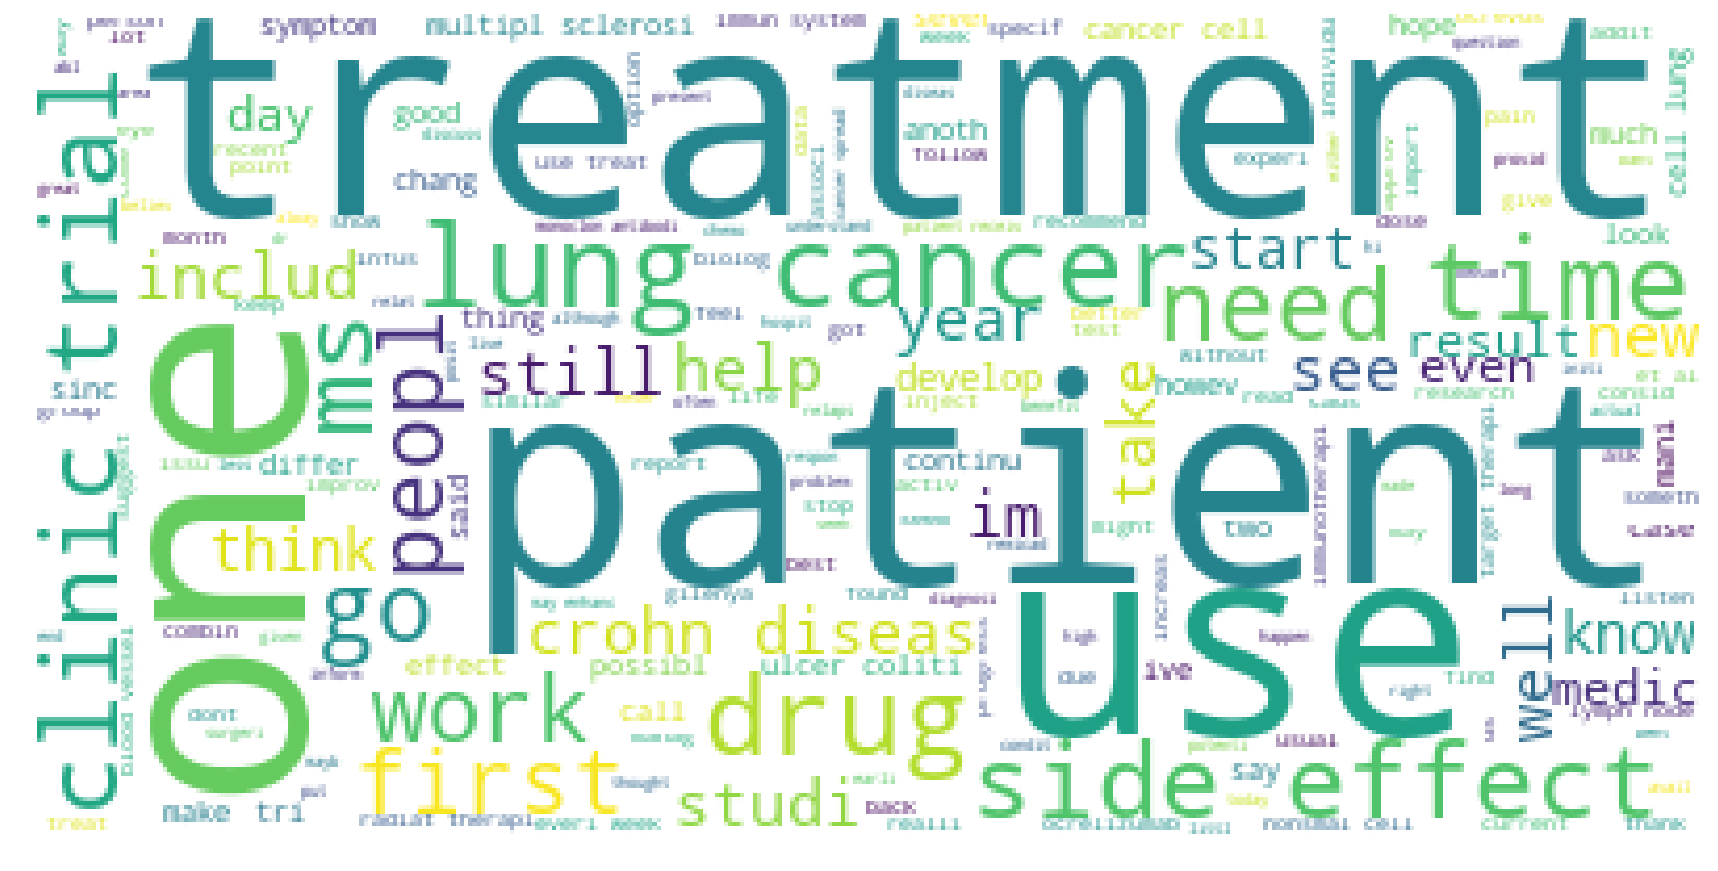

In [96]:
# Wordcloud after preprocessing of the data

text_string = " ".join(df1['text'].str.lower())
wordcloud = WordCloud(background_color='white').generate(text_string)
plt.figure(figsize=(30,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Finding of the sentiment score.

In [97]:
df.head()

,text,drug,sentiment
0,autoimmun diseas tend come cluster as gilenya ...,gilenya,2
1,i complet understand youd want tri but result ...,gilenya,2
2,interest target sp receptor rather like fingol...,fingolimod,2
3,veri interest grand merci now i wonder lemtrad...,ocrevus,2
4,hi everybodi my latest mri result brain cervic...,gilenya,1


In [98]:
df1.head()

,text,drug
0,previous stabl natalizumab switch fingolimod,fingolimod
1,on fingolimod sinc decemb way i describ better...,fingolimod
2,appar shingl i red spot left breast appear day...,humira
3,if docetaxel week x week week claim less harsh...,tagrisso
4,cc stelara work matter day if gi will jump hoo...,stelara


### Using TextBlob to Identify Polarity and Subjectivity.

### Polarity is the level of sentiment in the text and Subjectivity is the level of opinion in the text.

In [99]:
from textblob import TextBlob

In [102]:
# Finding of the Polarity and Subjectivity for the training set.
df['Polarity'] = df.apply(lambda x: TextBlob(x['text']).sentiment.polarity,axis=1)
df['Subjectivity'] = df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity,axis=1)

In [103]:
# Finding of the Polarity and Subjectivity for the training set.
df1['Polarity'] = df1.apply(lambda x: TextBlob(x['text']).sentiment.polarity,axis=1)
df1['Subjectivity'] = df1.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity,axis=1)

In [104]:
df.head(10)

,text,drug,sentiment,Polarity,Subjectivity
0,autoimmun diseas tend come cluster as gilenya ...,gilenya,2,0.366667,0.388889
1,i complet understand youd want tri but result ...,gilenya,2,0.167708,0.287500
2,interest target sp receptor rather like fingol...,fingolimod,2,0.014291,0.588332
3,veri interest grand merci now i wonder lemtrad...,ocrevus,2,0.500000,1.000000
4,hi everybodi my latest mri result brain cervic...,gilenya,1,0.322727,0.475758
5,i cant give advic lemtrada i chose cladribin h...,cladribine,2,0.000000,0.000000
6,repli post jesszidek hi jess sorri read challe...,humira,0,0.150000,0.144444
7,well expect neurologist want start tysabri i k...,gilenya,2,0.058333,0.386111
8,whi think fingolimod miser failur progress ms ...,fingolimod,1,-0.166667,0.166667
9,thank muchim learn lot grace i mention husband...,tagrisso,2,0.250000,0.333333


In [105]:
df1.head(10)

,text,drug,Polarity,Subjectivity
0,previous stabl natalizumab switch fingolimod,fingolimod,-0.166667,0.166667
1,on fingolimod sinc decemb way i describ better...,fingolimod,0.000000,0.750000
2,appar shingl i red spot left breast appear day...,humira,-0.025000,0.446296
3,if docetaxel week x week week claim less harsh...,tagrisso,-0.052381,0.345238
4,cc stelara work matter day if gi will jump hoo...,stelara,-0.059135,0.401948
5,janssen biotech inc receiv fda approv new biol...,stelara,0.136364,0.454545
6,i i thought thing would better one year ms tal...,ocrevus,0.067268,0.421164
7,dec basha fowler i diagnos rd week dec egfriv ...,tagrisso,0.185795,0.419318
8,hi i start gilenya week ago woeful anxieti tim...,gilenya,0.316667,0.700000
9,my uncl still go treatment kind chemo keytruda...,keytruda,0.027778,0.340278


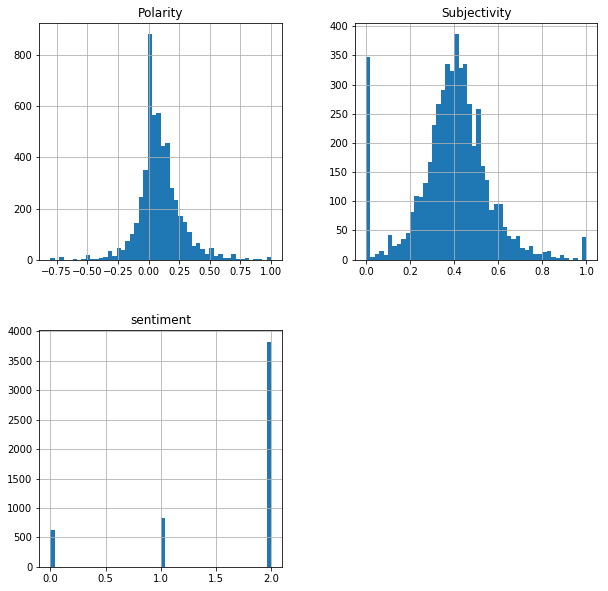

In [108]:
# Histograms of Polarity and Subjectivty for the training set.

df.hist(bins=50,figsize=(10,10))
plt.show()

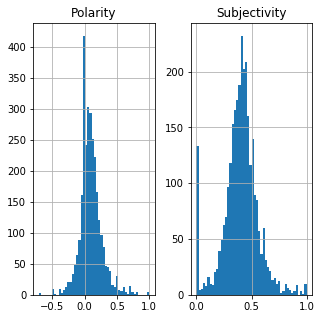

In [110]:
# Histograms of Polarity and Subjectivty for the testing set.

df1.hist(bins=50,figsize=(5,5))
plt.show()

In [115]:
def ratio(x):
    if x>0:
        return 'Positive'
    elif x==0:
        return 'Neutral'
    else:
        return 'Negative'

In [116]:
df['Sentiment'] = df['Polarity'].apply(ratio)

In [117]:
df1['Sentiment'] = df1['Polarity'].apply(ratio)

In [118]:
df.head()

,text,drug,sentiment,Polarity,Subjectivity,Sentiment
0,autoimmun diseas tend come cluster as gilenya ...,gilenya,2,0.366667,0.388889,Positive
1,i complet understand youd want tri but result ...,gilenya,2,0.167708,0.287500,Positive
2,interest target sp receptor rather like fingol...,fingolimod,2,0.014291,0.588332,Positive
3,veri interest grand merci now i wonder lemtrad...,ocrevus,2,0.500000,1.000000,Positive
4,hi everybodi my latest mri result brain cervic...,gilenya,1,0.322727,0.475758,Positive


In [120]:
df1.head()

,text,drug,Polarity,Subjectivity,Sentiment
0,previous stabl natalizumab switch fingolimod,fingolimod,-0.166667,0.166667,Negative
1,on fingolimod sinc decemb way i describ better...,fingolimod,0.000000,0.750000,Neutral
2,appar shingl i red spot left breast appear day...,humira,-0.025000,0.446296,Negative
3,if docetaxel week x week week claim less harsh...,tagrisso,-0.052381,0.345238,Negative
4,cc stelara work matter day if gi will jump hoo...,stelara,-0.059135,0.401948,Negative


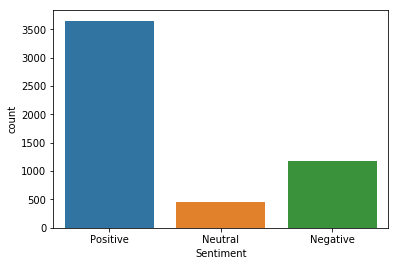

In [121]:
# Countplot for the Sentiment in training set.
sns.countplot(df['Sentiment'])
plt.show()

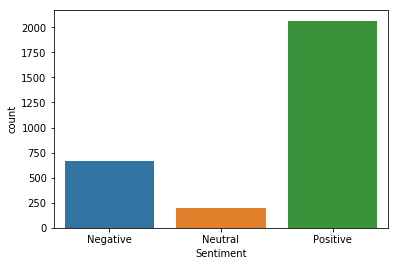

In [122]:
# Countplot for the Sentiment in training set.
sns.countplot(df1['Sentiment'])
plt.show()

In [ ]:
med_df = 